<a href="https://colab.research.google.com/github/Akashwadile21/CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [ ]:
uploaded=files.upload()


Saving tested.csv to tested.csv


In [ ]:
#Loading DataSet and #xploring the Dataset
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Showing the shape Of the Dataset
df.shape

(418, 12)

In [ ]:
# Showing the info of  the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Checking Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.drop(["Cabin"],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [ ]:
df['Age'].value_counts()

30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: Age, Length: 80, dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
print(df['Sex'].dtype)

object


In [ ]:
df.replace({'Sex':{'male': 0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
#Exploratory Analysis and Visualization

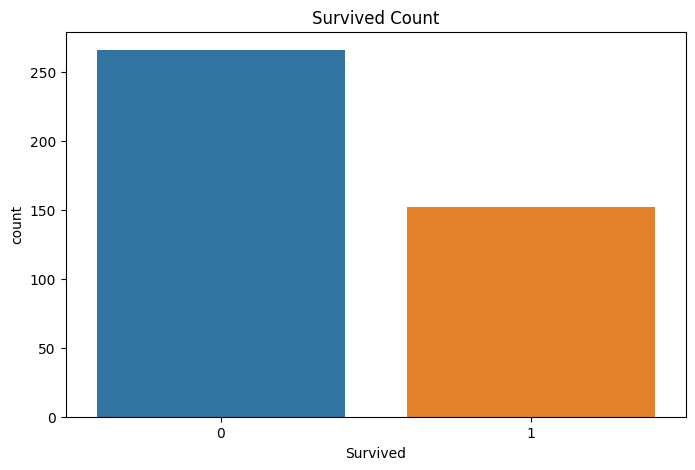

In [ ]:

#finding survived
plt.figure(figsize=(8, 5))
sns.countplot(data=df,x='Survived')
plt.title("Survived Count")
plt.show()

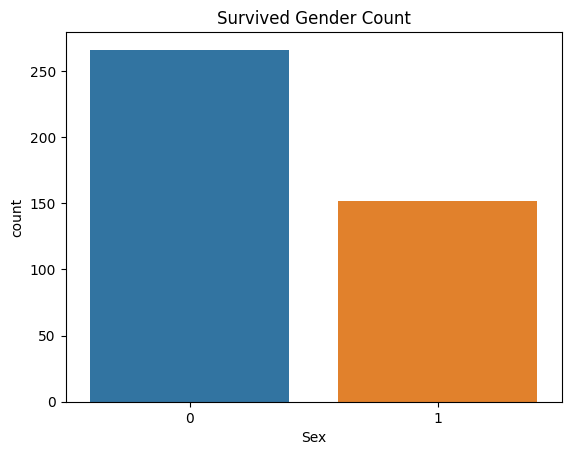

In [ ]:
#Distribution of Sex
sns.countplot(data=df, x='Sex')
plt.title('Survived Gender Count')
plt.show()

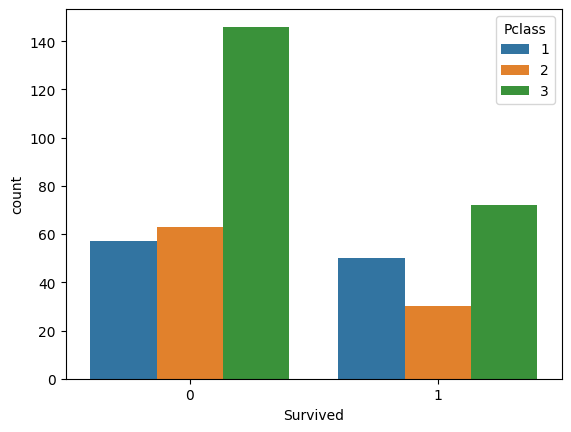

In [ ]:
#distribution of Pclass respect to survived
sns.countplot(data=df, x='Survived',hue='Pclass')
plt.show()


<Figure size 1000x600 with 0 Axes>

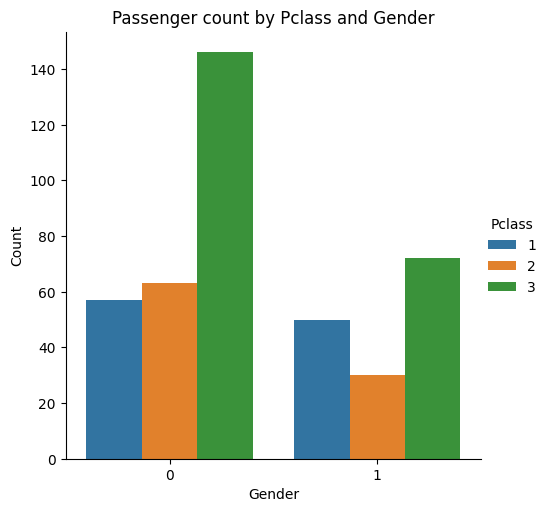

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(data=df,x='Sex',kind='count',hue='Pclass')
plt.title("Passenger count by Pclass and Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
#SEPERATING FEAUTURES AND TARGET

In [ ]:
#Drop unnecessary features
x=df.drop(columns=['PassengerId'	,'Name','Ticket','Fare','Survived'],axis=1)
y=df['Survived']

In [ ]:
print(x)

     Pclass  Sex       Age  SibSp  Parch  Embarked
0         3    0  34.50000      0      0         2
1         3    1  47.00000      1      0         0
2         2    0  62.00000      0      0         2
3         3    0  27.00000      0      0         0
4         3    1  22.00000      1      1         0
..      ...  ...       ...    ...    ...       ...
413       3    0  30.27259      0      0         0
414       1    1  39.00000      0      0         1
415       3    0  38.50000      0      0         0
416       3    0  30.27259      0      0         0
417       3    0  30.27259      1      1         1

[418 rows x 6 columns]


In [ ]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:
#SPLITTING INTO TRAIN AND TEST

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print(x_train.shape,x_test.shape,x.shape)

(334, 6) (84, 6) (418, 6)


In [ ]:
#MODEL TRAINNING

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)
x_predtr=model.predict(x_train)
print(x_predtr)

[0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1
 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0
 1]


In [ ]:
train_data_accuracy=accuracy_score(y_train,x_predtr)

In [ ]:
print("Accuracy Score of training data: ",train_data_accuracy)

Accuracy Score of training data:  1.0


In [ ]:
x_test_prediction=model.predict(x_test)

In [ ]:
print(x_test_prediction)

[0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1
 1 0 1 0 1 1 0 0 0 1]


In [ ]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [ ]:
print("Accuracy score of testing data:",test_data_accuracy)

Accuracy score of testing data: 1.0
